#### Introdcution
The BDNF(Brain-Derived Neurotrophic Factor) levels was measureed by using Elisa test kit(LsBio). The whole blood was withdrawn by using infusion kits and syringe. The purpose of this analysis to determine which method can achieved the highest BDNF levels and the subject's BDNF level.

In [158]:
"""
Created on Tuesday 8 Nov 2022
Author: ZMW
"""
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statistics
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import numpy.random as npr
from scipy.optimize import leastsq
import warnings
warnings.filterwarnings('ignore')

In [61]:
#data path
path = os.getcwd()
dirname = os.path.dirname(path)
data_file = 'data/241022_raw.xlsx'
data_path = os.path.join(dirname,data_file)

In [62]:
#Load the fitted dataset
data = pd.read_excel(data_path)
data = data.iloc[9:17,7:13]#slice rows and columns where data exist
#data = data.loc[:,~data.columns.str.contains('Unnamed')]
data.columns = ['STD_1','Sample_1','Sample_2','Sample_3','Sample_4','STD_2']


#### Plate layout

|  -ve control | Blank | Ci  | Blank  |  Ci | -ve control  |
|---|---|---|---|---|---|
|  SD7 |  -ve control |  Ci | -ve control  | Ci  |  SD7 |
|  SD6 | Vi  |  Cs | Vi  | Cs  |  SD6 |
|  SD5 |  Vi|  Cs |  Vi | Cs  |  SD5 |
|  SD4 |  Si |   Ai|   Si|  Ai | SD4  |
|  SD3 |   Si|  Ai |  Si |  Ai | SD3  |
|  SD2 |  Zi|  As | Zi  |  As |   SD2|
|  SD1 |   Zi|   As|  Zi | As  |  SD1 |

### Raw

In [63]:
data

,STD_1,Sample_1,Sample_2,Sample_3,Sample_4,STD_2
9,0.0931,0.0351,2.7998,0.0438,1.401,0.0994
10,0.1334,0.0929,3.0572,0.091,1.3684,0.1147
11,0.1924,3.1344,3.0423,1.33,1.6039,0.1514
12,0.3013,3.3709,3.1532,1.4458,1.6948,0.2402
13,0.6267,3.0312,2.7925,1.3785,1.1714,0.4424
14,1.3532,2.9934,2.5798,1.3458,1.1146,0.9998
15,2.0369,2.7111,2.5806,1.1648,1.1583,1.8307
16,3.0215,2.5999,2.6795,1.1916,1.167,2.5033


### Blank correction

In [64]:
blank_average = (data.iloc[0,1] + data.iloc[0,3])/2


In [65]:
blank_corrected = data - blank_average

In [66]:
blank_corrected

,STD_1,Sample_1,Sample_2,Sample_3,Sample_4,STD_2
9,0.05365,-0.00435,2.76035,0.00435,1.36155,0.05995
10,0.09395,0.05345,3.01775,0.05155,1.32895,0.07525
11,0.15295,3.09495,3.00285,1.29055,1.56445,0.11195
12,0.26185,3.33145,3.11375,1.40635,1.65535,0.20075
13,0.58725,2.99175,2.75305,1.33905,1.13195,0.40295
14,1.31375,2.95395,2.54035,1.30635,1.07515,0.96035
15,1.99745,2.67165,2.54115,1.12535,1.11885,1.79125
16,2.98205,2.56045,2.64005,1.15215,1.12755,2.46385


### Average concentration

In [87]:
run_1 = [blank_corrected.iloc[2,1],blank_corrected.iloc[4,1],blank_corrected.iloc[6,1],blank_corrected.iloc[0,2],blank_corrected.iloc[2,2],blank_corrected.iloc[4,2],blank_corrected.iloc[6,2]]

In [86]:
run_2 = [blank_corrected.iloc[3,1],blank_corrected.iloc[5,1],blank_corrected.iloc[7,1],blank_corrected.iloc[1,2],blank_corrected.iloc[3,2],blank_corrected.iloc[5,2],blank_corrected.iloc[7,2]]

In [262]:
# standard deviation
stdev_1 = statistics.stdev([blank_corrected.iloc[2,1],blank_corrected.iloc[3,1]])
stdev_2 = statistics.stdev([blank_corrected.iloc[4,1],blank_corrected.iloc[5,1]])
stdev_3 = statistics.stdev([blank_corrected.iloc[6,1],blank_corrected.iloc[7,1]])
stdev_4 = statistics.stdev([blank_corrected.iloc[0,2],blank_corrected.iloc[1,2]])
stdev_5 = statistics.stdev([blank_corrected.iloc[2,2],blank_corrected.iloc[3,2]])
stdev_6 = statistics.stdev([blank_corrected.iloc[4,2],blank_corrected.iloc[5,2]])
stdev_7 = statistics.stdev([blank_corrected.iloc[6,2],blank_corrected.iloc[7,2]])

# average
mean_1 = statistics.mean([blank_corrected.iloc[2,1],blank_corrected.iloc[3,1]])
mean_2 = statistics.mean([blank_corrected.iloc[4,1],blank_corrected.iloc[5,1]])
mean_3 = statistics.mean([blank_corrected.iloc[6,1],blank_corrected.iloc[7,1]])
mean_4 = statistics.mean([blank_corrected.iloc[0,2],blank_corrected.iloc[1,2]])
mean_5 = statistics.mean([blank_corrected.iloc[2,2],blank_corrected.iloc[3,2]])
mean_6 = statistics.mean([blank_corrected.iloc[4,2],blank_corrected.iloc[5,2]])
mean_7 = statistics.mean([blank_corrected.iloc[6,2],blank_corrected.iloc[7,2]])

# cv(%)
cv_1 = (stdev_1/mean_1)*100
cv_2 = (stdev_2/mean_2)*100
cv_3 = (stdev_3/mean_3)*100
cv_4 = (stdev_4/mean_4)*100
cv_5 = (stdev_5/mean_5)*100
cv_6 = (stdev_6/mean_6)*100
cv_7 = (stdev_7/mean_7)*100

In [281]:
col = {'samples':['Vi','Si','Zi','Ci','Cs','Ai','As'],'Run_1':run_1,'Run_2':run_2,'SD':[stdev_1,stdev_2,stdev_3,stdev_4,stdev_5,stdev_6,stdev_7],'CV(%)':[cv_1,cv_2,cv_3,cv_4,cv_5,cv_6,cv_7]}
samples = pd.DataFrame.from_dict(col)
samples['avg_samples'] = [mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7]
samples

,samples,Run_1,Run_2,SD,CV(%),avg_samples
0,Vi,3.09495,3.33145,0.167231,5.204493,3.21320
1,Si,2.99175,2.95395,0.026729,0.899091,2.97285
2,Zi,2.67165,2.56045,0.078630,3.005687,2.61605
3,Ci,2.76035,3.01775,0.182009,6.299970,2.88905
4,Cs,3.00285,3.11375,0.078418,2.564109,3.05830
5,Ai,2.75305,2.54035,0.150402,5.682609,2.64670
6,As,2.54115,2.64005,0.069933,2.699485,2.59060


### Standard 

In [255]:
avg_std = (blank_corrected.iloc[1:,0] + blank_corrected.iloc[1:,5])/2
concen_ng_ml =  [0.066, 0.164, 0.41, 1.024, 2.56, 6.4, 16]
std = {'avg_std':avg_std,'concentrations(ng/ml)':concen_ng_ml}
df_std = pd.DataFrame(std)
df_std

,avg_std,concentrations(ng/ml)
10,0.0846,0.066
11,0.13245,0.164
12,0.2313,0.410
13,0.4951,1.024
14,1.13705,2.560
15,1.89435,6.400
16,2.72295,16.000


### 4PL curve fitting

In [129]:
# define function
def logistic_4(x, A, B, C, D):
    """ 4PL logistic equation"""
    return ((A-D)/(1.0+((x/C)**B))) + D

In [238]:
# initial guesses
InitialGuess = [0.0846, 1.13705, 1.89435, 2.72295]

In [239]:
x = df_std['avg_std'].values.flatten()
y = df_std['concentrations(ng/ml)'].values.flatten()

In [246]:
#curve fit data into model
ET_popt, ET_pcov = curve_fit(logistic_4, x, y, p0=InitialGuess)
ET_perr = np.sqrt(np.diag(ET_pcov))

y_pred = logistic_4(x, *ET_popt)

R_sq_ET = r2_score(y_pred, y)

#print(ET_popt) # print fitted parameters
print("ET fit R^2: ", R_sq_ET)

ET fit R^2:  0.9971478134466123


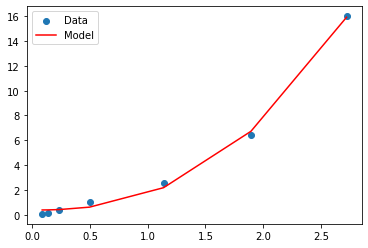

In [245]:
plt.scatter(x,y,label='Data')
plt.plot(x, logistic_4(x, *ET_popt), 'r', label="Model")
plt.legend()
plt.show()

In [282]:
samples

,samples,Run_1,Run_2,SD,CV(%),avg_samples
0,Vi,3.09495,3.33145,0.167231,5.204493,3.21320
1,Si,2.99175,2.95395,0.026729,0.899091,2.97285
2,Zi,2.67165,2.56045,0.078630,3.005687,2.61605
3,Ci,2.76035,3.01775,0.182009,6.299970,2.88905
4,Cs,3.00285,3.11375,0.078418,2.564109,3.05830
5,Ai,2.75305,2.54035,0.150402,5.682609,2.64670
6,As,2.54115,2.64005,0.069933,2.699485,2.59060


### Computed values

In [315]:
A, B , C, D = ET_popt
comp_values= {'samples':['Vi','Si','Zi','Ci','Cs','Ai','As'],
    'OD':[logistic_4(samples.iloc[0,5],A, B, C, D),logistic_4(samples.iloc[1,5],A, B, C, D),logistic_4(samples.iloc[2,5],A, B, C, D),
          logistic_4(samples.iloc[3,5],A, B, C, D),logistic_4(samples.iloc[4,5],A, B, C, D),logistic_4(samples.iloc[5,5],A, B, C, D),
          logistic_4(samples.iloc[6,5],A, B, C, D)]}
df_comp = pd.DataFrame(comp_values)
df_comp['OD']= df_comp['OD']*10
df_comp

,samples,OD
0,Vi,237.562427
1,Si,196.758735
2,Zi,144.548300
3,Ci,183.613702
4,Cs,210.733870
5,Ai,148.652794
6,As,141.193331


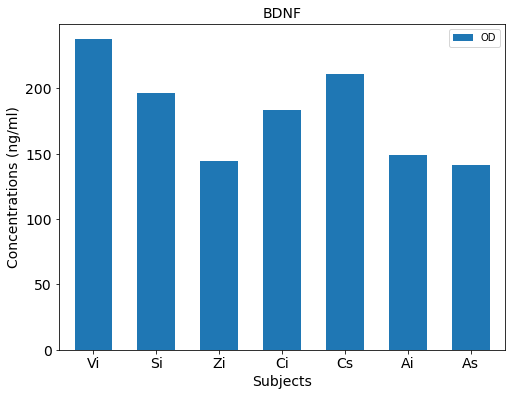

In [320]:
ax = df_comp.plot.bar(x='samples',y='OD',rot=0,width=0.6,figsize=(8,6))
plt.title('BDNF',fontsize=14)
plt.xlabel('Subjects',fontsize=14)
plt.ylabel('Concentrations (ng/ml)',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
